In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
26,382 cases (7 day average) as of Thu 19 Aug, +193.0 since Wed 18 Aug
778 hospitalised (7 day average) as of Sun 22 Aug, +1.0 since Sat 21 Aug
76 died (7 day average) as of Thu 19 Aug, -1.0 since Wed 18 Aug


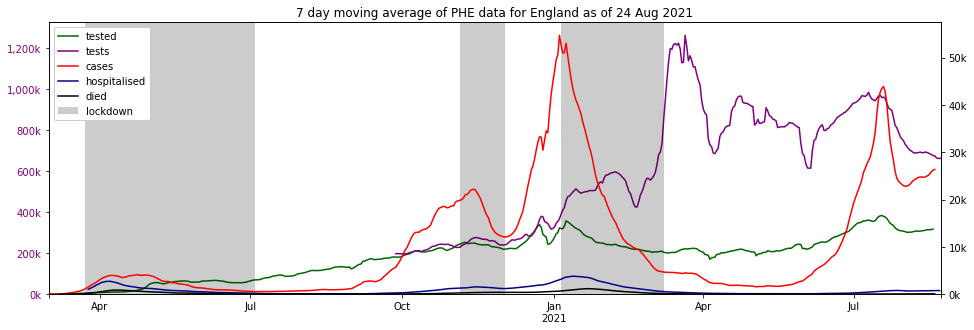

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

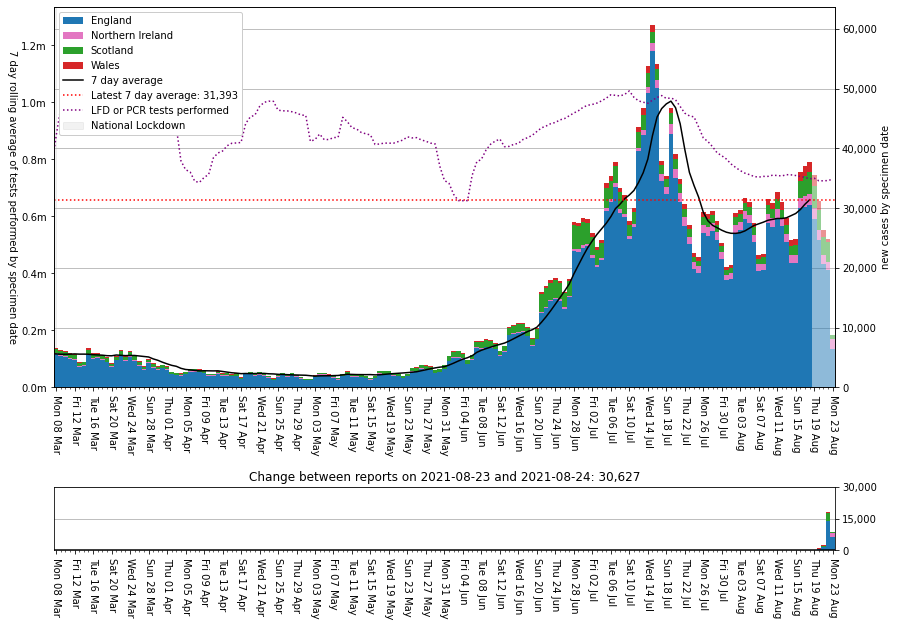

In [4]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

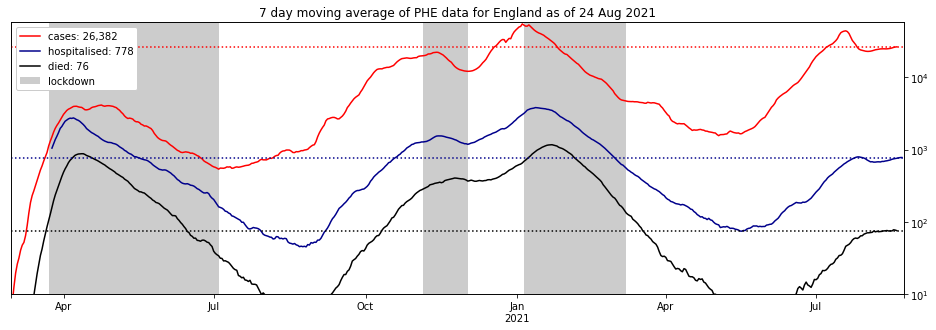

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

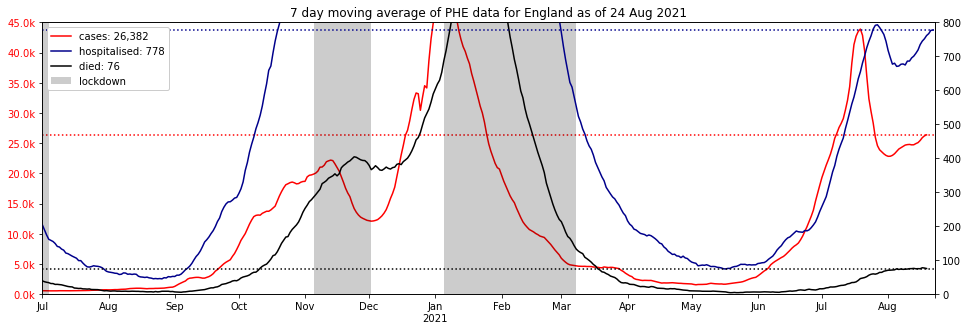

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,23 Aug 21,"+35,040,581","+40,042,271","+35,040,581","+113,005","+37,974","+113,005"
Northern Ireland,23 Aug 21,"+1,147,741","+1,270,066","+1,147,741","+1,725","+1,893","+1,725"
Scotland,23 Aug 21,"+3,587,145","+4,085,552","+3,587,145","+15,103","+2,854","+15,103"
Wales,23 Aug 21,"+2,166,569","+2,339,253","+2,166,569","+1,450","+3,680","+1,450"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,35040581.0,40042271.0,5001690.0,56286961,62.253460,8.886054,28.860485
1,Northern Ireland,N92000002,1147741.0,1270066.0,122325.0,1893667,60.609442,6.459689,32.930869
2,Scotland,S92000003,3587145.0,4085552.0,498407.0,5463300,65.658942,9.122820,25.218238
3,Wales,W92000004,2166569.0,2339253.0,172684.0,3152879,68.717163,5.477026,25.805811


'partial: 47,737,142 (71.5%), full: 41,942,036'

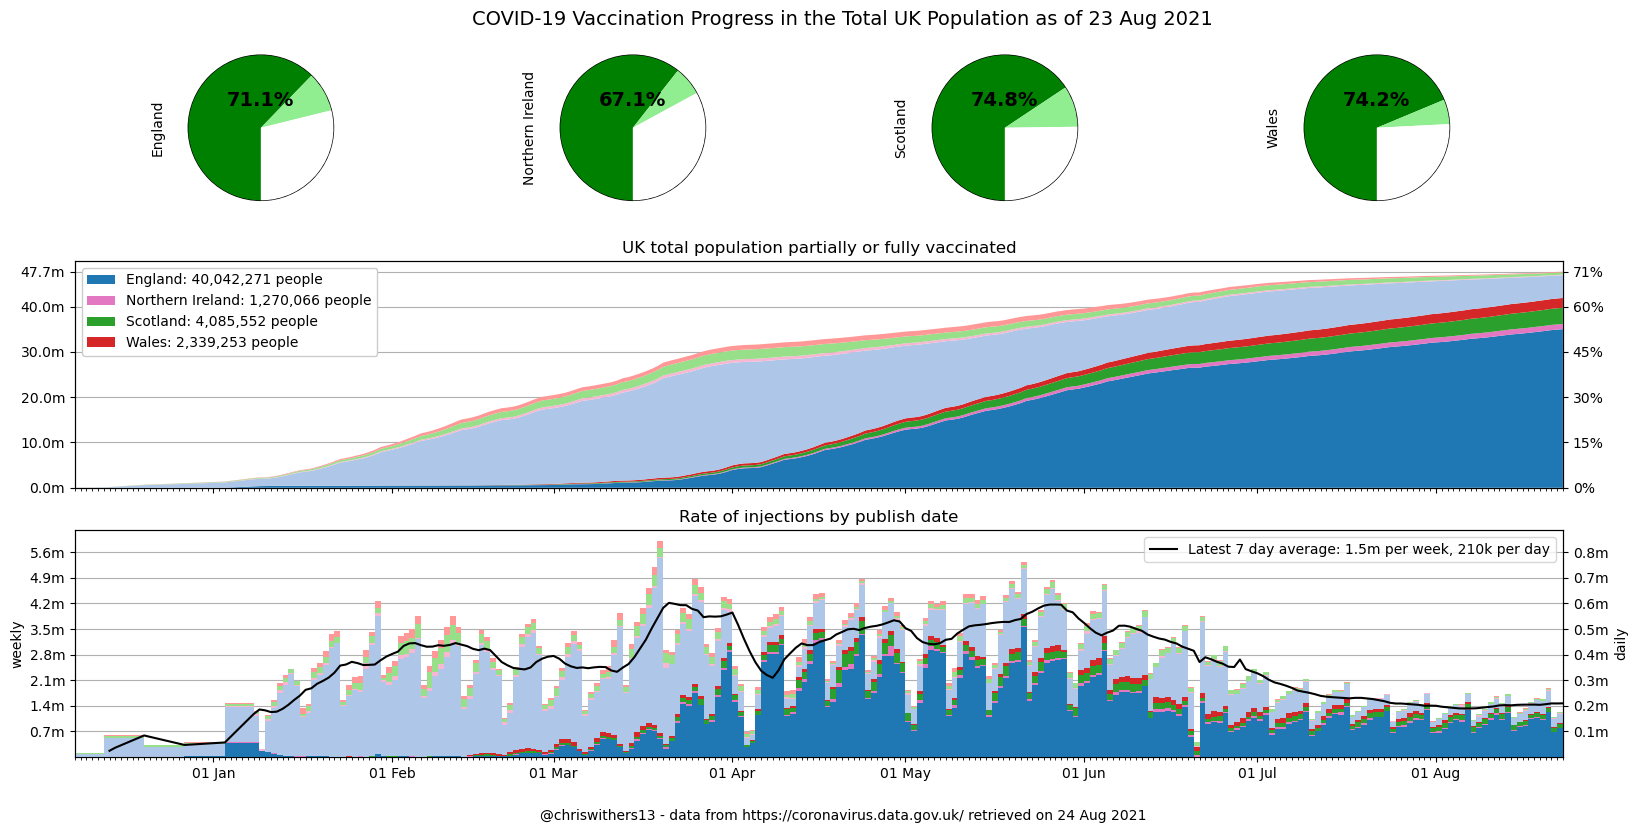

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

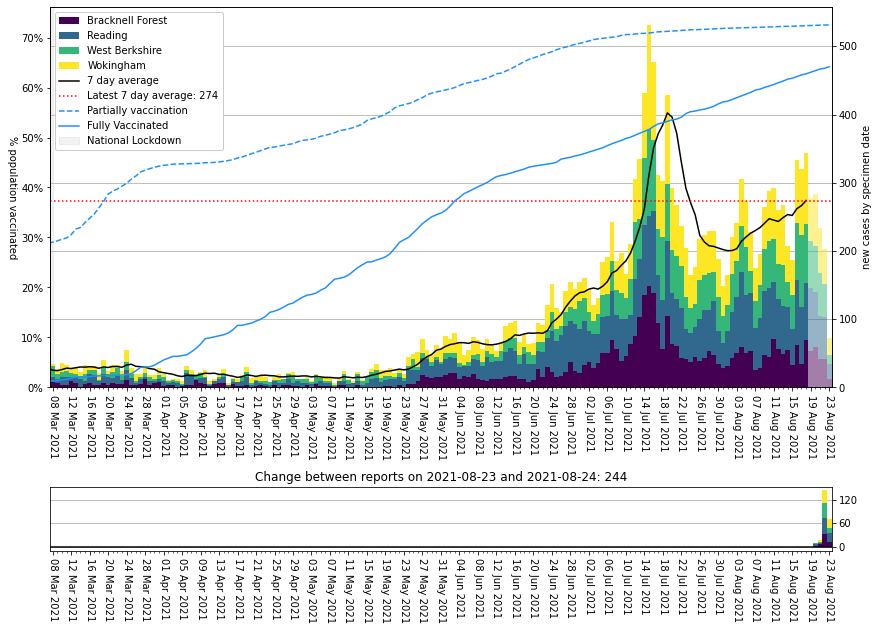

In [9]:
plot_areas(for_date, areas=my_areas, lines=population_vaccinated)

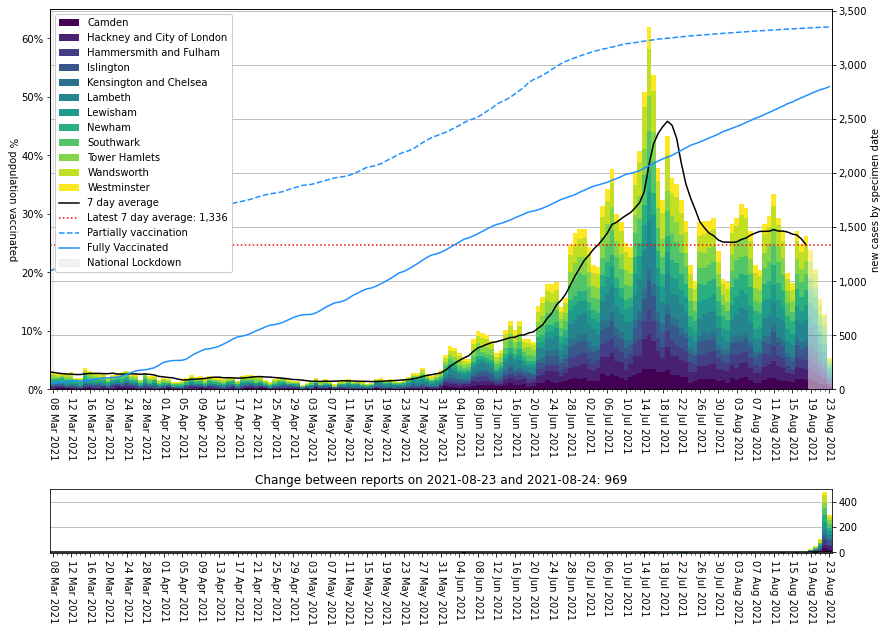

In [10]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
N09000006,Fermanagh and Omagh,1004.284607,1179.0,2021-08-23
N09000005,Derry City and Strabane,990.190635,1498.0,2021-08-23
E06000052,Cornwall and Isles of Scilly,744.138705,4255.0,2021-08-23
S12000039,West Dunbartonshire,687.057236,611.0,2021-08-23
N09000002,"Armagh City, Banbridge and Craigavon",665.109503,1438.0,2021-08-23
E07000047,West Devon,639.830812,357.0,2021-08-23
S12000045,East Dunbartonshire,634.204713,689.0,2021-08-23
N09000009,Mid Ulster,626.817839,931.0,2021-08-23
E07000188,Sedgemoor,611.310461,753.0,2021-08-23


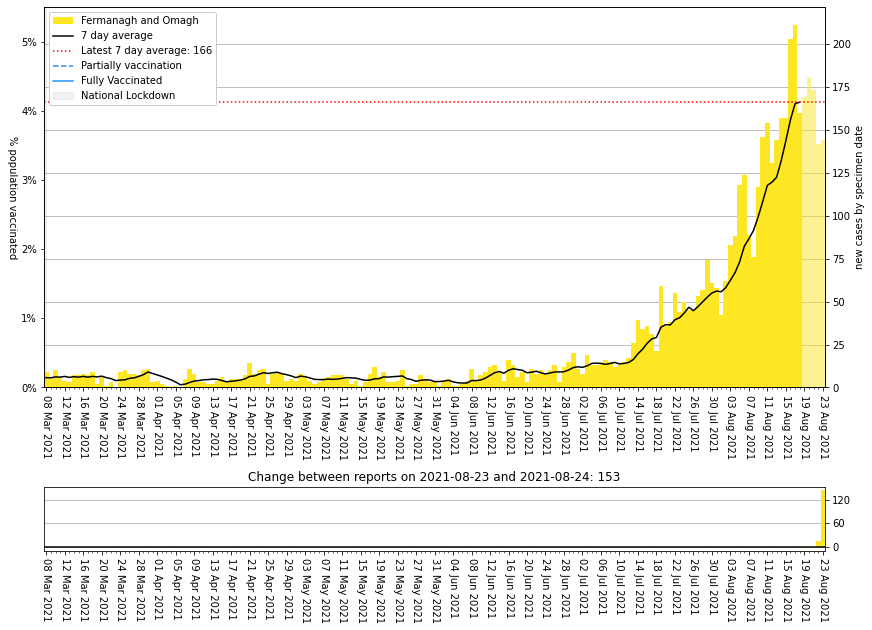

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000052,Cornwall and Isles of Scilly,744.138705,4255.0,2021-08-23
S12000049,Glasgow City,514.120546,3255.0,2021-08-23
E08000025,Birmingham,268.432042,3065.0,2021-08-23
E08000035,Leeds,300.577831,2384.0,2021-08-23
S12000036,City of Edinburgh,434.915132,2283.0,2021-08-23
N09000003,Belfast,607.785948,2088.0,2021-08-23
E06000023,"Bristol, City of",387.589371,1796.0,2021-08-23
S12000050,North Lanarkshire,519.670738,1774.0,2021-08-23
E06000054,Wiltshire,348.383278,1742.0,2021-08-23


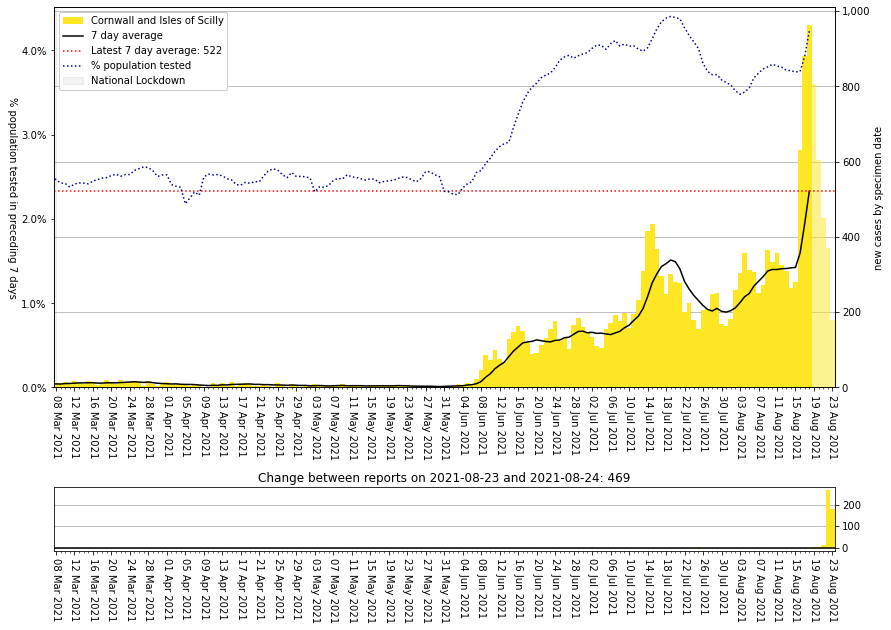

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [22]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.1

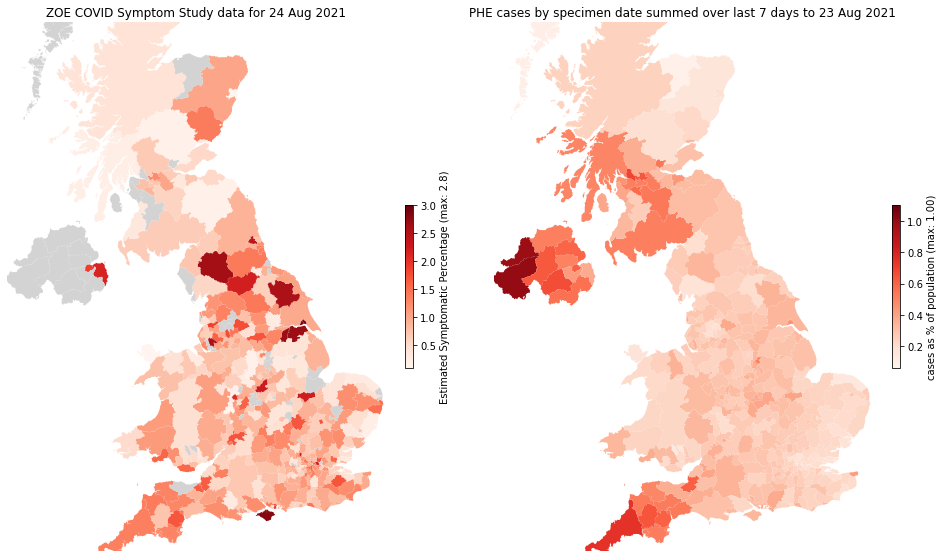

In [23]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [24]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...